# Time Series Weather Forcasting

## Import the Libraries

In [23]:
# Importing the Libraries
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib as mpl
import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
# making the default settings
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['axes.grid'] = False
# import plotly.io as pio
# pio.renderers.default = 'browser'

## Import the Dataset

In [25]:
# Importing the dataset
zip_path = tf.keras.utils.get_file(
    origin = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip",
    fname = "jena_climate_2009_2016.csv.zip",
    extract = True
)
csv_path, _ = os.path.splitext(zip_path)

In [26]:
df = pd.read_csv(csv_path)
df.head()

# To Save the data
# df.to_csv("jena_climate_2009_2016.csv")

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

## Details about the Data


In [27]:
df.shape

(420551, 15)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [29]:
df.describe().T

count         mean        std      min      25%      50%  \
p (mbar)         420551.0   989.212776   8.358481   913.60   984.20   989.58   
T (degC)         420551.0     9.450147   8.423365   -23.01     3.36     9.42   
Tpot (K)         420551.0   283.492743   8.504471   250.60   277.43   283.47   
Tdew (degC)      420551.0     4.955854   6.730674   -25.01     0.24     5.22   
rh (%)           420551.0    76.008259  16.476175    12.95    65.21    79.30   
VPmax (mbar)     420551.0    13.576251   7.739020     0.95     7.78    11.82   
VPact (mbar)     420551.0     9.533756   4.184164     0.79     6.21     8.86   
VPdef (mbar)     420551.0     4.042412   4.896851     0.00     0.87     2.19   
sh (g/kg)        420551.0     6.022408   2.656139     0.50     3.92     5.59   
H2OC (mmol/mol)  420551.0     9.640223   4.235395     0.80     6.29     8.96   
rho (g/m**3)     420551.0  1216.062748  39.975208  1059.45  1187.49  1213.79   
wv (m/s)         420551.0     1.702224  65.446714 -9999.00     0.99     1.76   
max. wv (m/s)    420551.0     3.056555  69.016932 -9999.00     1.76     2.96   
wd (deg)         420551.0   174.743738  86.681693     0.00   124.90   198.10   

                     75%      max  
p (mbar)          994.72  1015.35  
T (degC)           15.47    37.28  
Tpot (K)          289.53   311.34  
Tdew (degC)        10.07    23.11  
rh (%)             89.40   100.00  
VPmax (mbar)       17.60    63.77  
VPact (mbar)       12.35    28.32  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.80    18.13  
H2OC (mmol/mol)    12.49    28.82  
rho (g/m**3)     1242.77  1393.54  
wv (m/s)            2.86    28.49  
max. wv (m/s)       4.74    23.50  
wd (deg)          234.10   360.00

As we cans see the wind velocity has minimum value of -9999.00 meters/second, which is not possible in any way.

We can take Hourly data instead of data with 10 minutes interval.

In [30]:
# select the data based on the Date Time Column for every 2 hours interval
# we will use the Slicing Operation
df_sample = df[11::12]
df_sample.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
11  01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77    93.2   
23  01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02    92.6   
35  01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62    92.7   
47  01.01.2009 08:00:00    999.17     -8.10    265.12        -9.05    92.8   
59  01.01.2009 10:00:00   1000.27     -7.04    266.10        -8.17    91.6   

    VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
11          3.12          2.90          0.21       1.81             2.91   
23          3.07          2.85          0.23       1.78             2.85   
35          2.93          2.71          0.21       1.69             2.72   
47          3.31          3.07          0.24       1.92             3.08   
59          3.60          3.30          0.30       2.05             3.29   

    rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
11       1312.25      0.25           0.63     190.3  
23       1313.61      0.10           0.38     240.0  
35       1317.71      0.05           0.50     146.0  
47       1311.65      0.72           1.25     213.9  
59       1307.76      1.45           3.00     292.6

In [31]:
# We removed the Date Time column from the dataframe
date_time = pd.to_datetime(df_sample.pop('Date Time'), format = '%d.%m.%Y %H:%M:%S')
df_sample.head()

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
11    996.62     -8.88    264.54        -9.77    93.2          3.12   
23    996.99     -9.05    264.34       -10.02    92.6          3.07   
35    997.71     -9.67    263.66       -10.62    92.7          2.93   
47    999.17     -8.10    265.12        -9.05    92.8          3.31   
59   1000.27     -7.04    266.10        -8.17    91.6          3.60   

    VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
11          2.90          0.21       1.81             2.91       1312.25   
23          2.85          0.23       1.78             2.85       1313.61   
35          2.71          0.21       1.69             2.72       1317.71   
47          3.07          0.24       1.92             3.08       1311.65   
59          3.30          0.30       2.05             3.29       1307.76   

    wv (m/s)  max. wv (m/s)  wd (deg)  
11      0.25           0.63     190.3  
23      0.10           0.38     240.0  
35      0.05           0.50     146.0  
47      0.72           1.25     213.9  
59      1.45           3.00     292.6

## Data Visualization

In [32]:
# Get the names of the columns in dataframe
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

array([<Axes: xlabel='Date Time'>, <Axes: xlabel='Date Time'>],
      dtype=object)

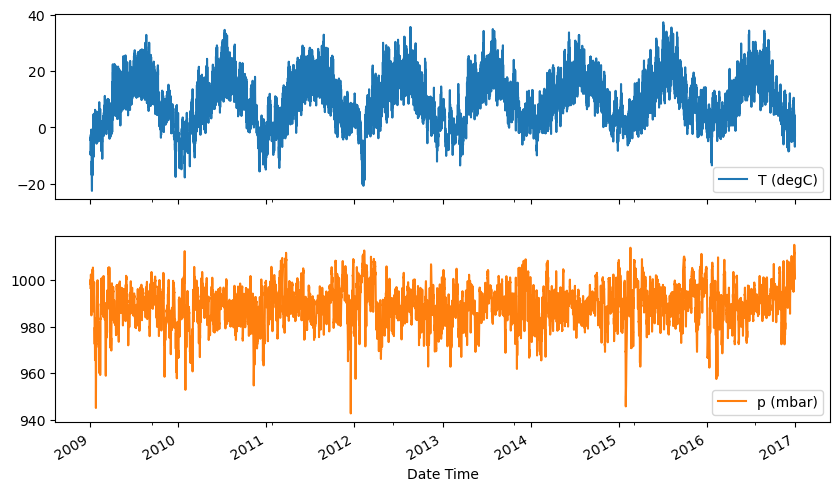

In [33]:
plot_cols = ['T (degC)', 'p (mbar)']
plot_features = df_sample[plot_cols]
plot_features.index = date_time
plot_features.plot(subplots = True)

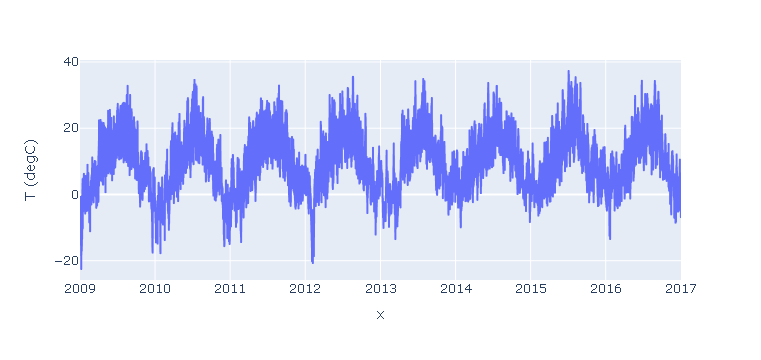

In [34]:
# make the same plots in plotly
fig = px.line(df_sample, x = date_time, y = 'T (degC)')
fig.show()
fig = px.line(df_sample, x = date_time, y = 'p (mbar)')
fig.update_traces(line_color = 'red')
fig.show()

array([<Axes: xlabel='Date Time'>, <Axes: xlabel='Date Time'>],
      dtype=object)

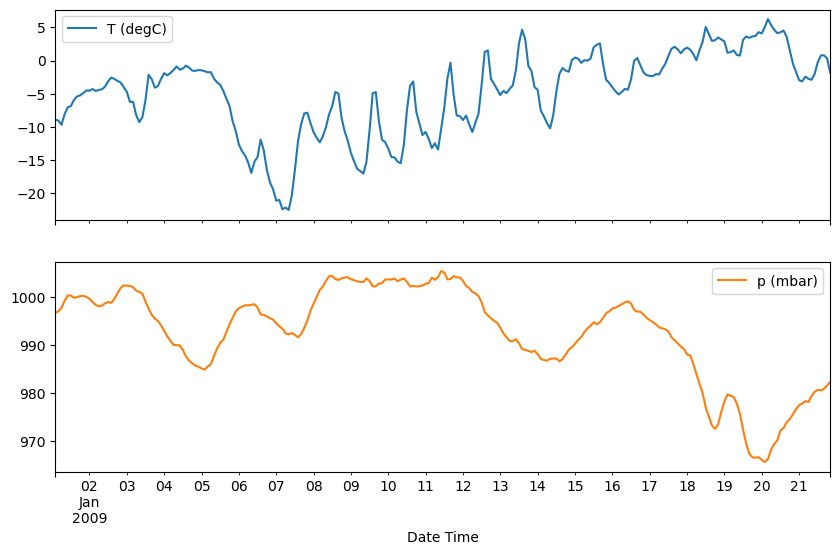

In [35]:
# We shall make the plot for the first 500 hrs for better visualization
plot_cols = ['T (degC)', 'p (mbar)']
plot_features = df_sample[plot_cols][:250]
plot_features.index = date_time[:250]
plot_features.plot(subplots = True)

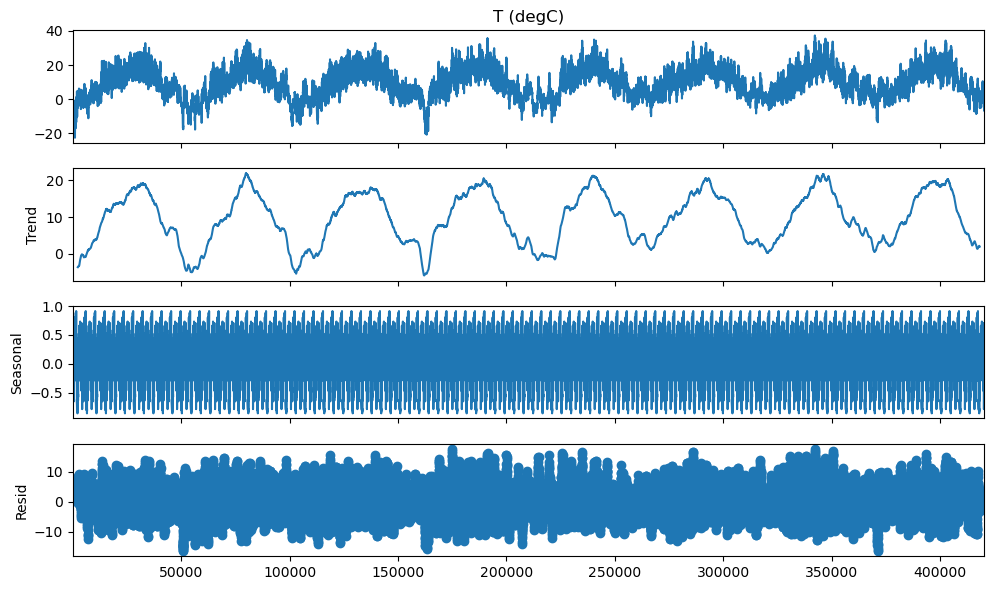

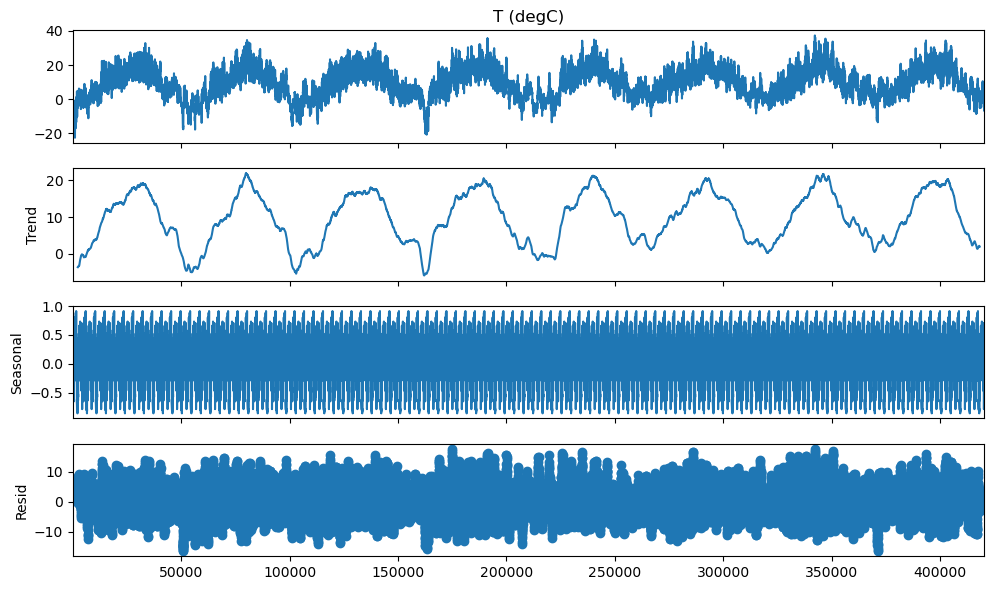

In [44]:
# Lets Decompose the data
decompose = seasonal_decompose(df_sample['T (degC)'], model='additive', period=365)
# We use the additve model as the temperature can go -ve and zero
decompose.plot()

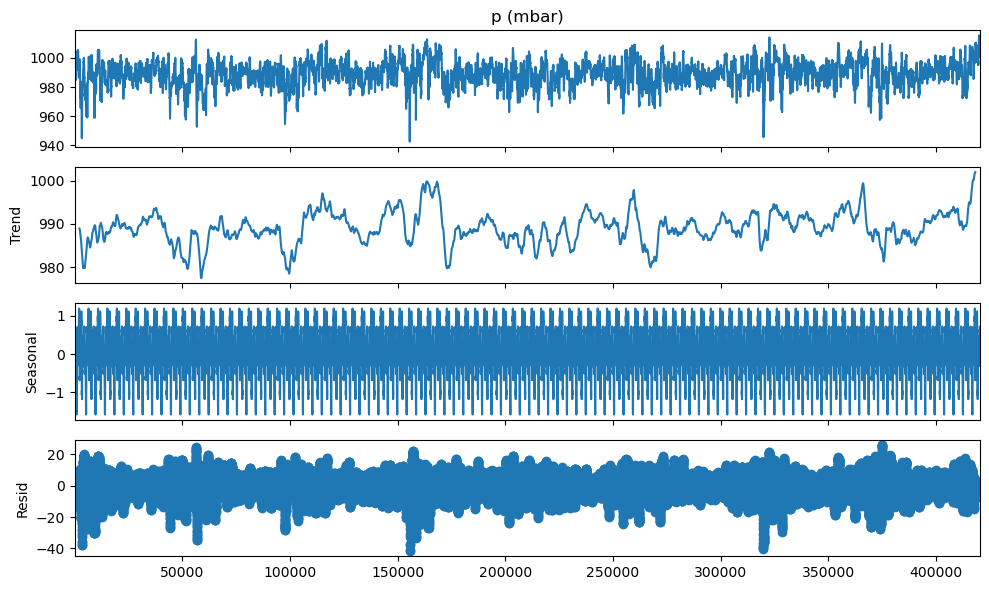

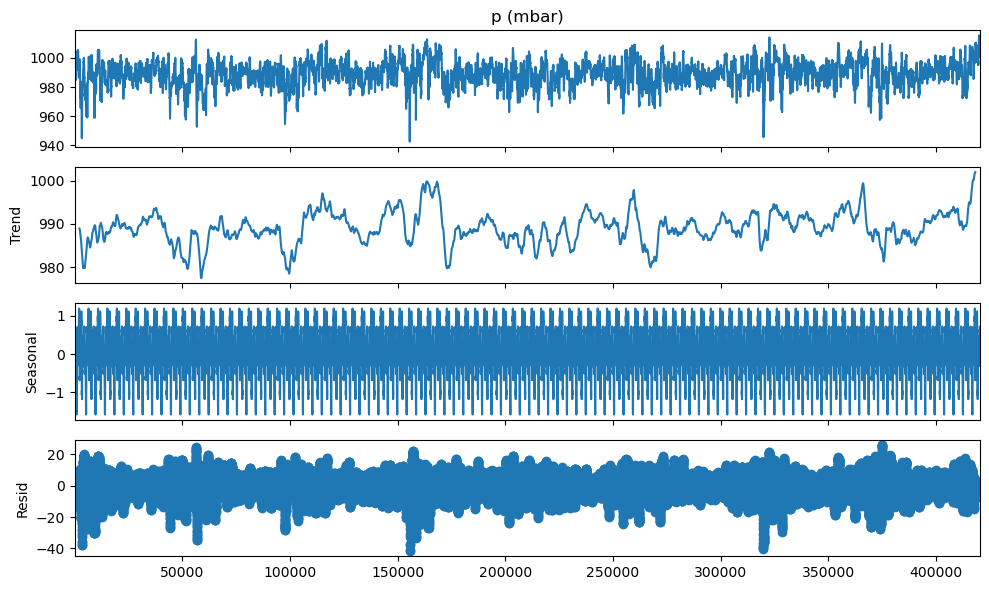

In [45]:
decompose = seasonal_decompose(df_sample['p (mbar)'], model='additive', period=365)
# We use the additve model as the temperature can go -ve and zero
decompose.plot()

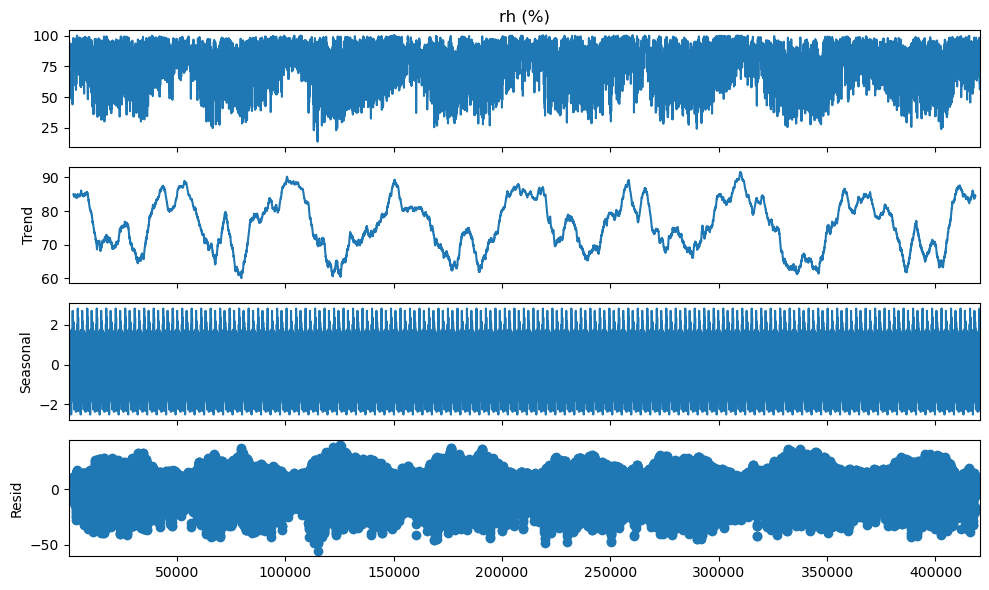

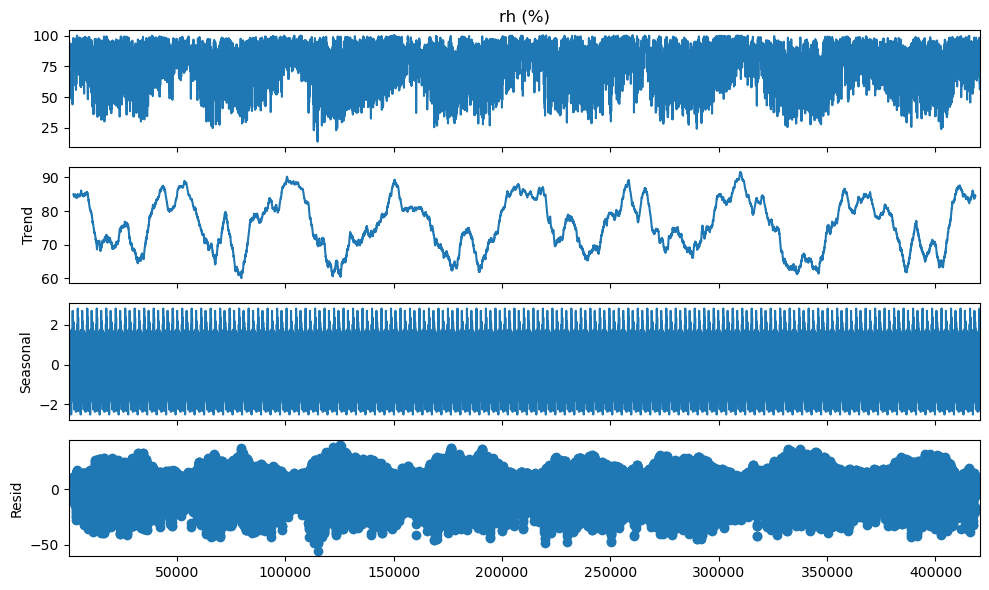

In [46]:
decompose = seasonal_decompose(df_sample['rh (%)'], model='additive', period=365)
# We use the additve model as the temperature can go -ve and zero
decompose.plot()

## Clean Up the Data

In [47]:
# Check for the Null Values
df_sample.isnull().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [48]:
df.describe().T

count         mean        std      min      25%      50%  \
p (mbar)         420551.0   989.212776   8.358481   913.60   984.20   989.58   
T (degC)         420551.0     9.450147   8.423365   -23.01     3.36     9.42   
Tpot (K)         420551.0   283.492743   8.504471   250.60   277.43   283.47   
Tdew (degC)      420551.0     4.955854   6.730674   -25.01     0.24     5.22   
rh (%)           420551.0    76.008259  16.476175    12.95    65.21    79.30   
VPmax (mbar)     420551.0    13.576251   7.739020     0.95     7.78    11.82   
VPact (mbar)     420551.0     9.533756   4.184164     0.79     6.21     8.86   
VPdef (mbar)     420551.0     4.042412   4.896851     0.00     0.87     2.19   
sh (g/kg)        420551.0     6.022408   2.656139     0.50     3.92     5.59   
H2OC (mmol/mol)  420551.0     9.640223   4.235395     0.80     6.29     8.96   
rho (g/m**3)     420551.0  1216.062748  39.975208  1059.45  1187.49  1213.79   
wv (m/s)         420551.0     1.702224  65.446714 -9999.00     0.99     1.76   
max. wv (m/s)    420551.0     3.056555  69.016932 -9999.00     1.76     2.96   
wd (deg)         420551.0   174.743738  86.681693     0.00   124.90   198.10   

                     75%      max  
p (mbar)          994.72  1015.35  
T (degC)           15.47    37.28  
Tpot (K)          289.53   311.34  
Tdew (degC)        10.07    23.11  
rh (%)             89.40   100.00  
VPmax (mbar)       17.60    63.77  
VPact (mbar)       12.35    28.32  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.80    18.13  
H2OC (mmol/mol)    12.49    28.82  
rho (g/m**3)     1242.77  1393.54  
wv (m/s)            2.86    28.49  
max. wv (m/s)       4.74    23.50  
wd (deg)          234.10   360.00

In [51]:
# Change the Wind Velocity
wv = df_sample['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0
df_sample.describe().T

C:\Users\PS144\AppData\Local\Temp\ipykernel_7372\3691030964.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     2.128639   1.542289     0.00     0.99     1.76   
max. wv (m/s)    35045.0     3.532633   2.343832     0.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

In [52]:
# Change the Max wind velocity
max_wv = df_sample['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0
df_sample.describe().T

C:\Users\PS144\AppData\Local\Temp\ipykernel_7372\1635196336.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     2.128639   1.542289     0.00     0.99     1.76   
max. wv (m/s)    35045.0     3.532633   2.343832     0.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

## Model Preperation

In [54]:
# Split the Data into train, validation and Test
df_sample.shape

(35045, 14)

In [55]:
# We will take the 70% for training, 20% for validation and 10% for testing

# training data
train_df = df_sample[:24531]
# validation data
val_df = df_sample[24531:31540]
# testing data
test_df = df_sample[31540:]

# check the shape of the data
train_df.shape, val_df.shape, test_df.shape

((24531, 14), (7009, 14), (3505, 14))

We don't shuffle the data due to being time specific indexing.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

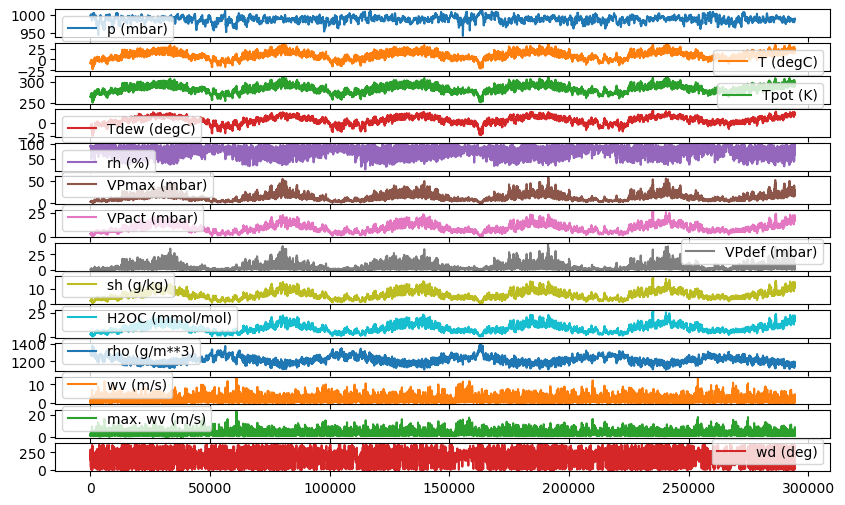

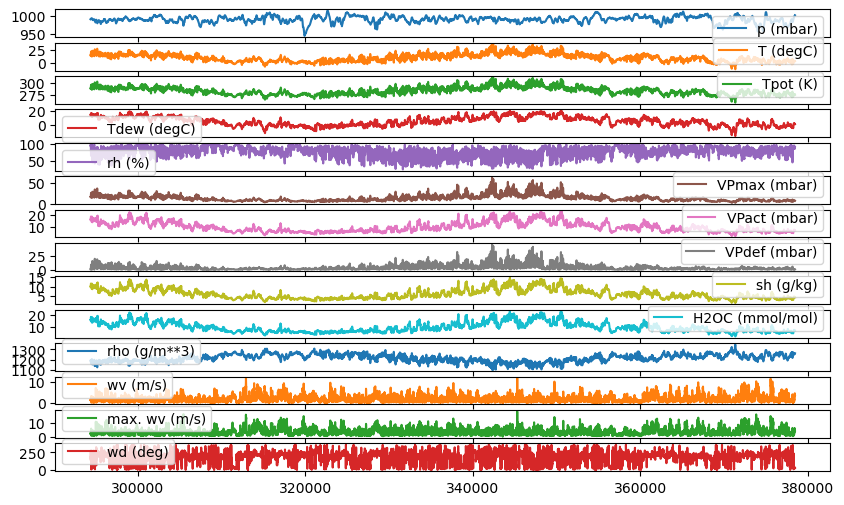

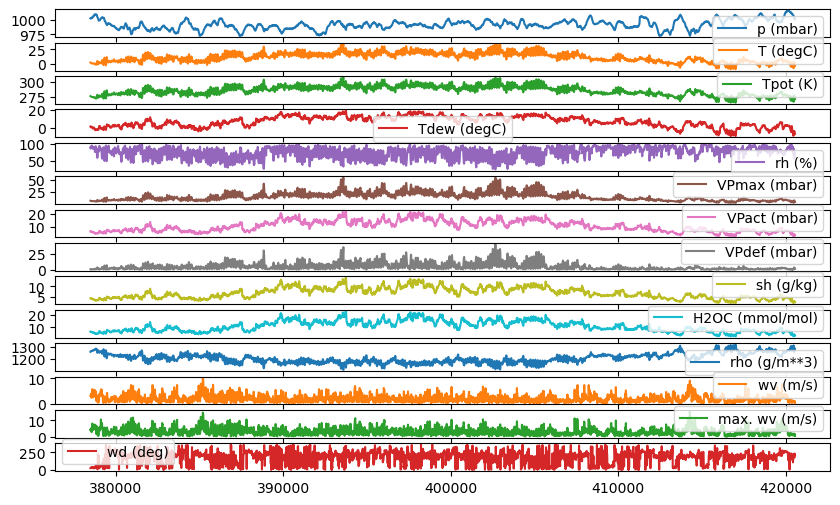

In [56]:
# lets plot the data

train_df.plot(subplots=True)
val_df.plot(subplots=True)
test_df.plot(subplots=True)

In [57]:
# Normalize the data
## We will use the standard scaling

train_mean = train_df.mean()
train_std = test_df.std()

train_df = (train_df - train_mean) / train_std

val_df = (val_df - train_mean) / train_std

test_df = (test_df - train_mean) / train_std

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

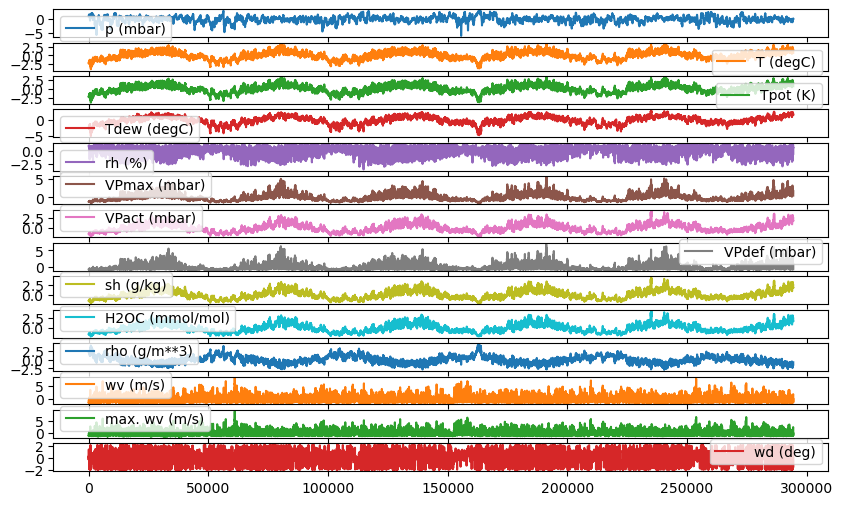

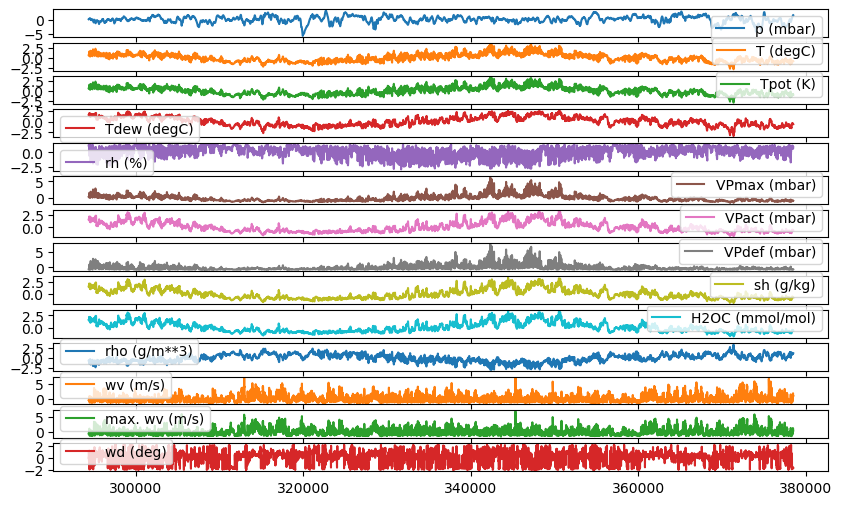

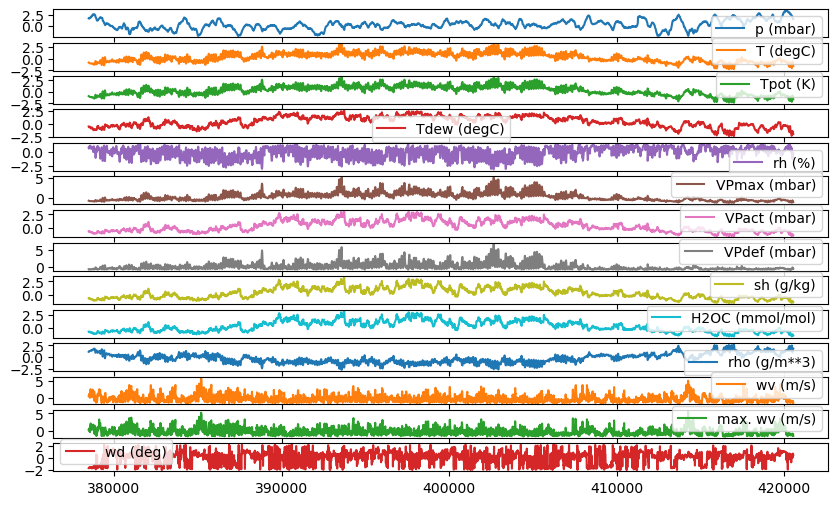

In [58]:
# lets plot the data affter Normalization

train_df.plot(subplots=True)
val_df.plot(subplots=True)
test_df.plot(subplots=True)

In [ ]:
# Now we will make the model to predict the Temperature
